### Harish Venkatesh

### Framingham Heart study

Appendix:
http://www.who.int/mediacentre/factsheets/fs317/en/

Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data


### Aim:

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using classification algorithms.

# Data Description


Demographic:

    Sex: male or female(Nominal)
    Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Education: no further information provided (Ordinal: PhD, Masters, Bachelors, High school)

Behavioral:

    Current Smoker: whether or not the patient is a current smoker (Nominal)
    Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Information on medical history:

    BP Meds: whether or not the patient was on blood pressure medication (categorical:Yes, No)
    Prevalent Stroke: whether or not the patient had previously had a stroke (categorical:Yes, No)
    Prevalent Hyp: whether or not the patient was hypertensive (categorical:Yes, No)
    Diabetes: whether or not the patient had diabetes (categorical:Yes, No)

Information on current medical condition:

    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    Glucose: glucose level (Continuous)

Target variable to predict:

    10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


# Importing libraries

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

# Creating dataframe for train dataset

In [357]:
df = pd.read_csv("framingham.csv")
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,PhD,0,0.0,0.0,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,Bachelor's,0,0.0,0.0,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,High school,1,20.0,0.0,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,Master's,1,30.0,0.0,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,Master's,1,23.0,0.0,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No


In [358]:
df.columns

Index(['Sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Sex                4240 non-null object
age                4240 non-null int64
education          4135 non-null object
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null object
prevalentHyp       4240 non-null object
diabetes           4240 non-null object
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 530.1+ KB


In [360]:
df.dtypes

Sex                 object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD          object
dtype: object

## Feature Encoding

In [364]:
from sklearn import preprocessing

df['education'] = df['education'].astype("|S")
le = preprocessing.LabelEncoder()
df['education'] = le.fit_transform(df.education.values)

In [366]:
df['Sex'] = df['Sex'].map({'Male':1,'Female':0})

In [367]:
df['prevalentStroke'] = df['prevalentStroke'].map({'Yes':1,'No':0})

In [368]:
df['prevalentHyp'] = df['prevalentHyp'].map({'Yes':1,'No':0})

In [369]:
df['diabetes'] = df['diabetes'].map({'Yes':1,'No':0})

In [370]:
df['TenYearCHD'] = df['TenYearCHD'].map({'Yes':1,'No':0})

In [371]:
df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,3,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,2,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,2,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [372]:
df.describe()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.164387,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.048980,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Exploratory Data Analysis

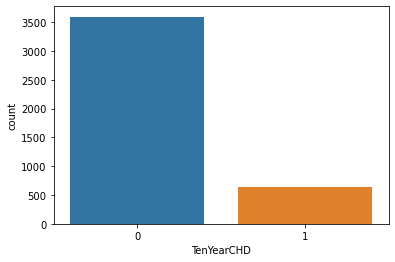

In [373]:
#target : TenYearCHD
sns.countplot(x='TenYearCHD',data=df)

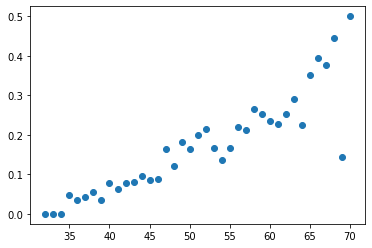

In [374]:
# age vs target
fig, ax = plt.subplots(1,1,facecolor='white')
x = sorted(df['age'].unique())
y = df.groupby(['age']).mean()['TenYearCHD'].values
plt.scatter(x,y)
plt.show()

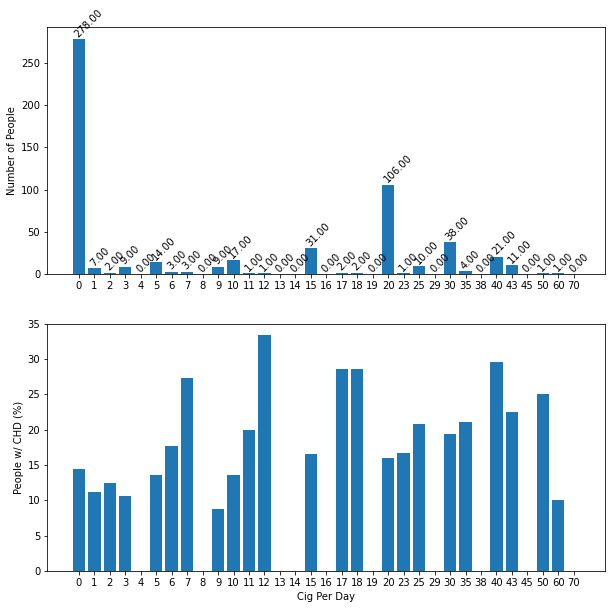

1 3


In [378]:
# cigsperday vs target

df_nan = df.dropna()
def autoLabel(rect,k=None):
    for b in rect:
        height = b.get_height()
        if k is None:
            ax.annotate("%.2f"%(height),
                       xy=(b.get_x(),height),
                        xytext=(0,0),
                       xycoords='data',
                       textcoords='offset points',
                       ha='left',
                       va='bottom')
        else:
                ax[k].annotate("%.2f"%(height),
                       xy=(b.get_x(),height),
                        xytext=(0,0),
                       xycoords='data',
                       textcoords='offset points',
                       ha='left',
                       va='bottom',
                        rotation=45)


fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10),facecolor='white')
dist = df_nan['cigsPerDay'].value_counts()
cigs = [int(x) for x in sorted(dist.index)] 
chdCount = dict(map(lambda x: [x,0],cigs))

for t,c in zip(df_nan['TenYearCHD'],df_nan['cigsPerDay']):
    chdCount[c] += t
rates = [(chdCount[c] / float(dist.loc[c]))*100 for c in cigs]

x = np.arange(len(cigs))

bar1 = ax[0].bar(x,chdCount.values())
ax[0].set_xticks(x)
ax[0].set_xticklabels(cigs)
ax[0].set_ylabel('Number of People')
ax[1].bar(x,rates)
ax[1].set_xticks(x)
ax[1].set_xticklabels(cigs)
ax[1].set_xlabel('Cig Per Day')
ax[1].set_ylabel('People w/ CHD (%)')

autoLabel(bar1,0)

plt.show()
print(chdCount[12],dist.loc[12])



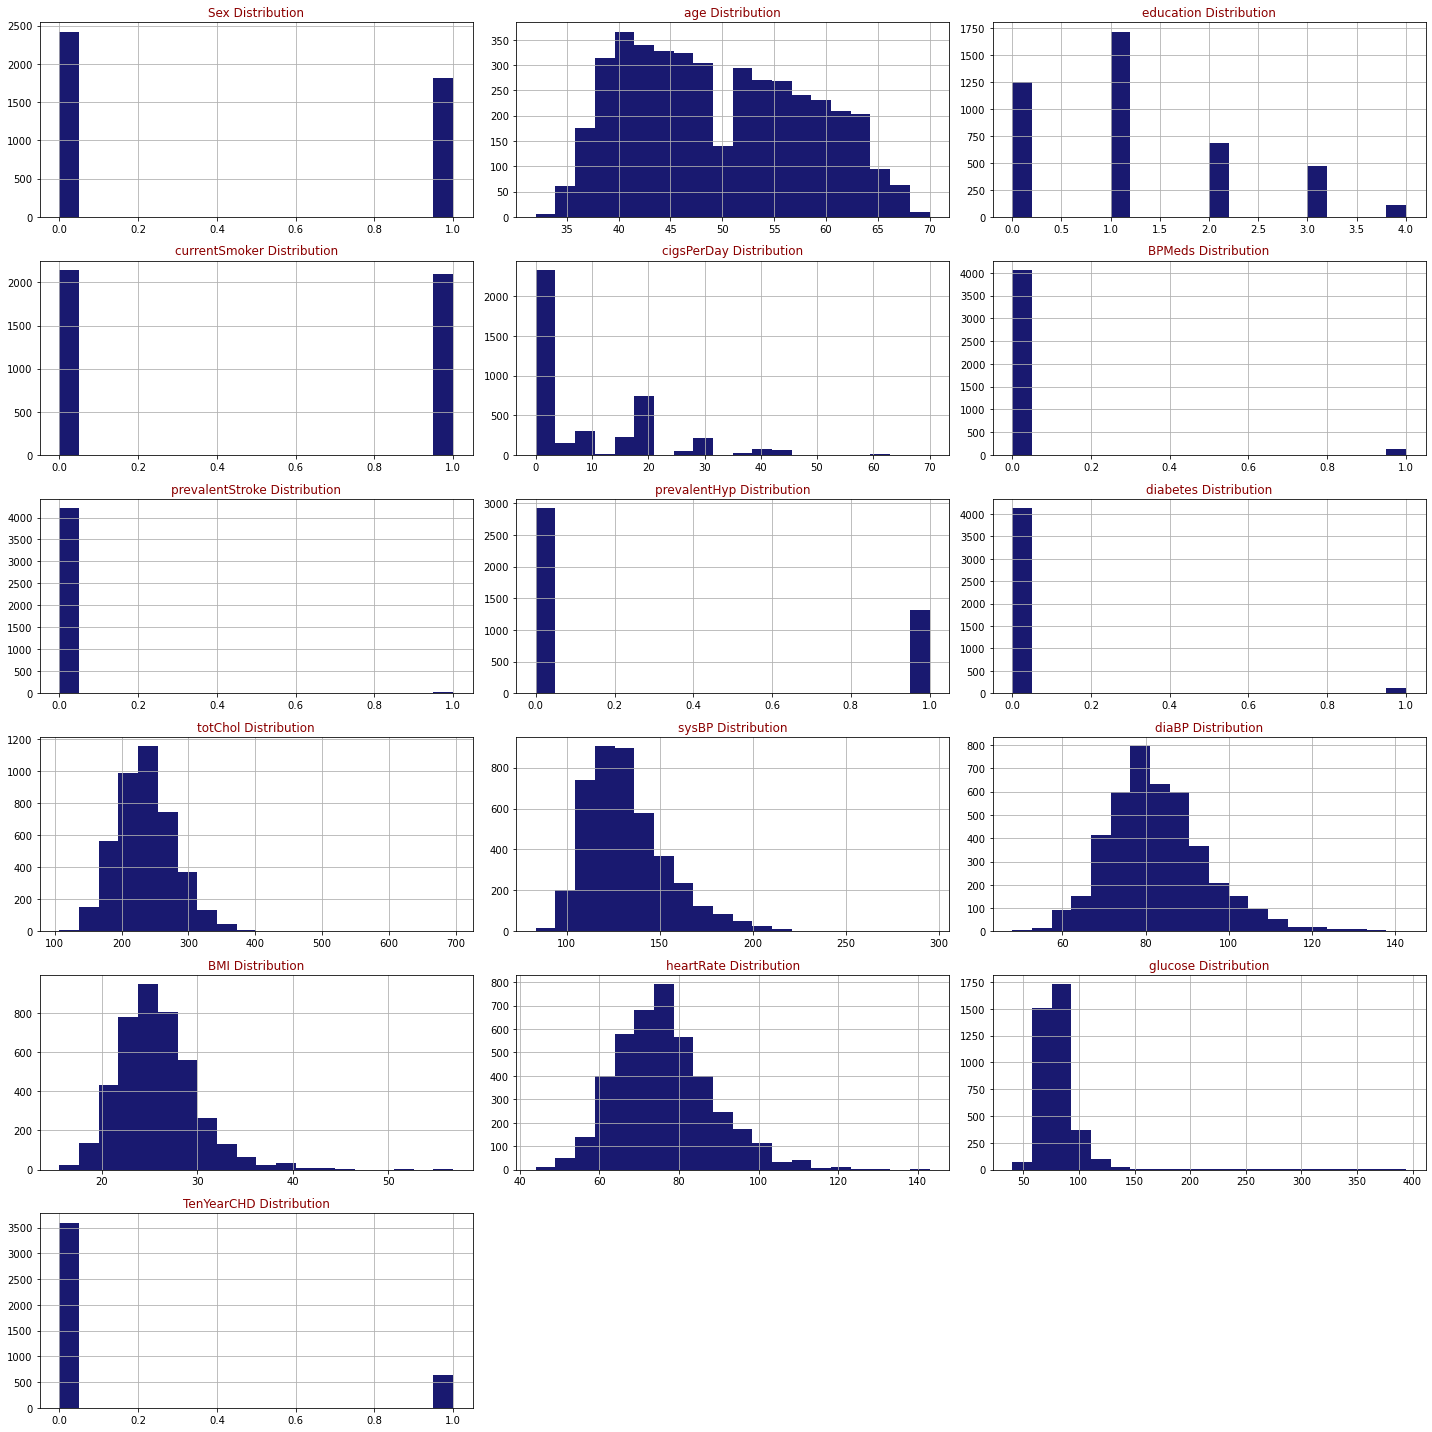

In [376]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

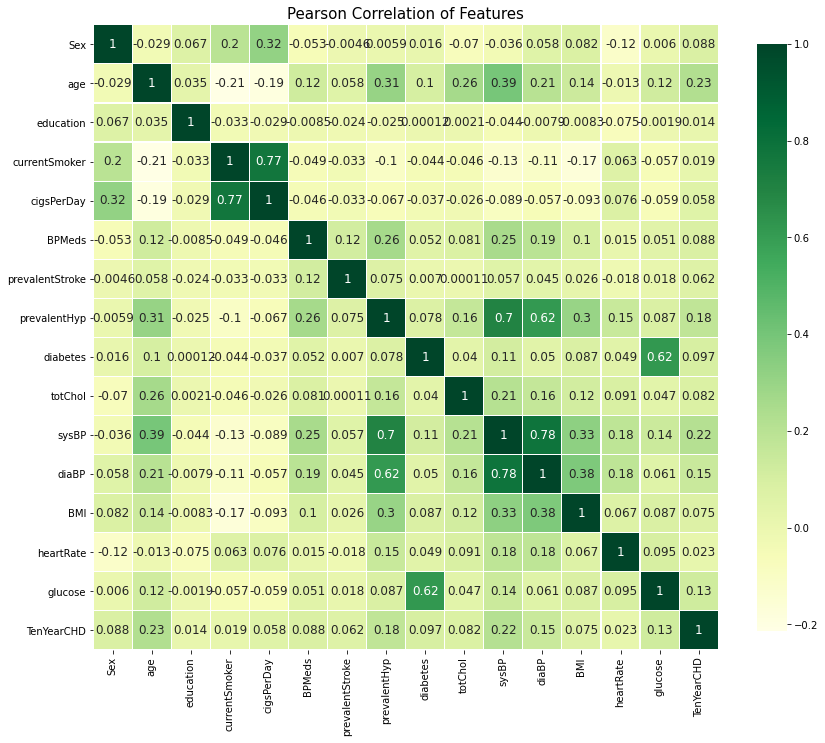

In [377]:
def correlation_heatmap(dataframe):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        dataframe.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


## Data Preprocessing (Dealing with missing values)

In [383]:
df.isnull().sum().sort_values(ascending = False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
education            0
age                  0
Sex                  0
dtype: int64

In [384]:
# Percentage of missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / len(df)*100).sort_values(ascending = False)
missingData = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missingData

,Total,Percent
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
TenYearCHD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000
diabetes,0,0.000000


# Imputing values and inserting dummy columns for computation

In [385]:
#
df['education'] = df['education'].fillna((df['education'].mode()))

In [386]:
#
df['cigsPerDay'] = df['cigsPerDay'].fillna((df['cigsPerDay'].median()))

In [387]:
#
df['BPMeds'] = df['BPMeds'].fillna(0)

In [388]:
#
df['totChol'] = df['totChol'].fillna((df['totChol'].median()))

In [389]:
#
df['BMI'] = df['BMI'].fillna((df['BMI'].median()))

In [390]:
#
df['heartRate'] = df['heartRate'].fillna((df['heartRate'].median()))

In [391]:
#
df['glucose'] = df['glucose'].fillna((df['glucose'].median()))

In [392]:
df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,3,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,2,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,2,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [393]:
#removing unwanted attributes
drop_elements = ['education','currentSmoker','BPMeds']
df = df.drop(drop_elements, axis=1)

In [394]:
df

,Sex,age,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,20.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,15.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [395]:
# Splitting the target feature.
y = df.iloc[:,-1].values
X = df.iloc[:,:-1].values

# Train test split and scaling

In [396]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #training and testing data split

In [397]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
# We are using Standard Scalar instead of MinMax Scalar because we don't have much outliers in our dataset.

In [398]:
X_train

array([[ 1.14500939, -0.88733772, -0.7543286 , ..., -0.1348867 ,
        -1.14868409,  0.73758511],
       [-0.87335528,  0.85318408, -0.7543286 , ...,  0.05608193,
        -1.72857496, -0.70116395],
       [-0.87335528, -0.65526815, -0.16289629, ...,  0.26638915,
        -1.3143672 , -0.16163305],
       ...,
       [ 1.14500939, -1.23544208,  0.93547799, ..., -0.33310731,
        -0.48595167, -0.02675033],
       [-0.87335528,  0.85318408, -0.7543286 , ..., -0.3814538 ,
        -0.07174391, -0.02675033],
       [-0.87335528, -1.11940729,  0.51302635, ...,  0.1721135 ,
        -0.07174391, -0.38643759]])

# Classification Task

# Logistic regression

In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve



In [400]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)


In [401]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_


{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [403]:
LR = LogisticRegression(penalty = 'l2', C= 0.1)
LR.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(LR.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.8550
Accuracy of logistic regression on test set: 0.8547


In [404]:
#Cross Validation
cvscore = cross_val_score(LR,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8490566  0.84591195 0.85062893 0.85377358 0.86163522]
Average cross-validation scroe: 0.8522


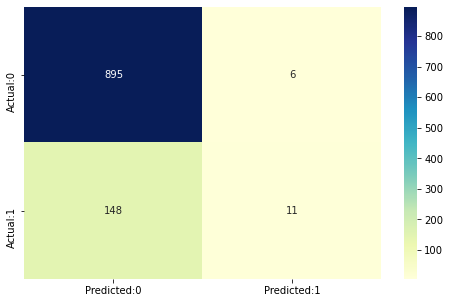

In [405]:
LR_predict = LR.predict(X_test)
cm=confusion_matrix(y_test,LR_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")



In [415]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {(log_accuracy*100)}")

Using logistic regression we get an accuracy of 85.47169811320755


# KNN Classification

In [407]:
from sklearn.neighbors import KNeighborsClassifier

# Create a new knn model
knn = KNeighborsClassifier()

# n_neighbors to test
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]

#using gridsearch to test all values for n-neighbors
knn_clf = GridSearchCV(knn, param_knn, cv=5)

#fitting the model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}])

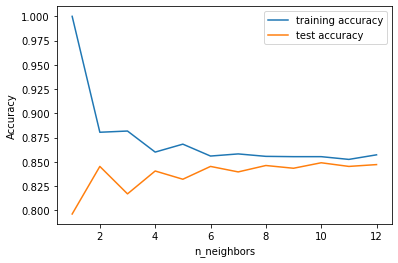

In [435]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    classifier2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(classifier2.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(classifier2.score(X_test, y_test))
#plotting train and test scores for n_neighbors from 1 to 10
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [436]:
#Best n_neighbhor value
knn_clf.best_params_


{'n_neighbors': 8}

In [437]:
#Validation score
knn_clf.best_score_

0.8493710691823899

In [409]:
KNN_best = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.4f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.8557
Accuracy of KNN classifier on test set: 0.8462


In [410]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(knn,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.84119497 0.82075472 0.82232704 0.83018868 0.84748428]
Average cross-validation scroe: 0.8324


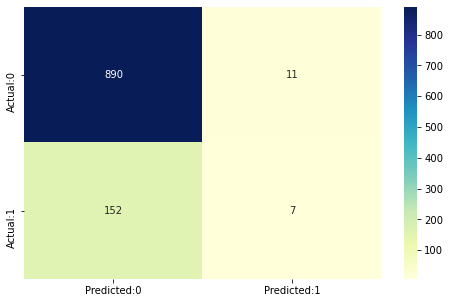

In [411]:
KNN_predicted = KNN_best.predict(X_test)
cm=confusion_matrix(y_test,KNN_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")



In [438]:
# Checking the accuracy
print(f"Using KNN Classification we get an accuracy of {(accuracy_score(y_test,KNN_predicted)*100)}")

Using KNN Classification we get an accuracy of 84.62264150943396


# Linear Support Vector Machine


In [424]:
from sklearn.svm import SVC, LinearSVC
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [425]:
# Uisng Grid search to find the best parameters and fitting the model
LinSVC_clf = GridSearchCV(LinearSVC(), LinSVM_params,cv=5)
LinSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [426]:
LinSVC_clf.best_params_

{'C': 1}

In [427]:
clf = LinearSVC (C=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
print('Accuracy of linear SVM on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.4f}'
     .format(LinSVC_clf.score(X_test, y_test)))

Accuracy of linear SVM on training set: 0.8513
Accuracy of linear SVM on test set: 0.8557


In [433]:
#Cross Validation
cvscore = cross_val_score(LinearSVC(C=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.85062893 0.84591195 0.85534591 0.8490566  0.85220126]
Average cross-validation score: 0.8506


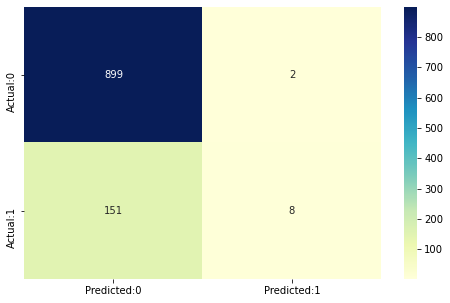

In [431]:
LSVC_predicted = clf.predict(X_test)
cm=confusion_matrix(y_test,LSVC_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [434]:
# Checking the accuracy
print(f"Using Linear SVC we get an accuracy of {(accuracy_score(y_test,LSVC_predicted)*100)}")

Using Linear SVC we get an accuracy of 85.56603773584905


#  Kernel SVM (Linear)

In [439]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['linear']}

In [440]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']})

In [441]:
KernelSVC_clf.best_params_

{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}

In [442]:
kernel_clf= SVC(kernel='linear', C= 0.001, gamma= 10)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.8475
Accuracy of Kernelized SVM on test set: 0.8500


In [443]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=0.001,gamma=10),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.84748428 0.84748428 0.84748428 0.84748428 0.84748428]
Average cross-validation score: 0.8475


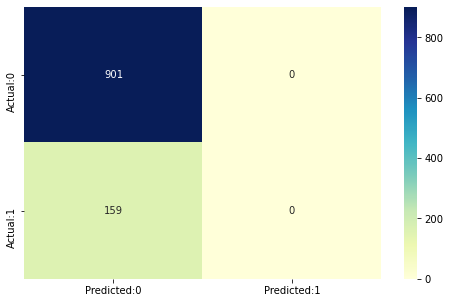

In [444]:
Kernel_SVC_linear_predicted = kernel_clf.predict(X_test)
cm=confusion_matrix(y_test,Kernel_SVC_linear_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [447]:
# Checking the accuracy
print(f"Using Kernel SVM (Linear) we get an accuracy of {accuracy_score(y_test,Kernel_SVC_linear_predicted)*100}")

Using Kernel SVM (Linear) we get an accuracy of 85.0


#  Kernel SVM (rbf)

In [448]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']}

In [449]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [450]:
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [451]:
kernel_clf= SVC(kernel='rbf', C= 1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.8619
Accuracy of Kernelized SVM on test set: 0.8462


In [452]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=1,gamma=0.1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8490566  0.84433962 0.85534591 0.8490566  0.84748428]
Average cross-validation score: 0.8491


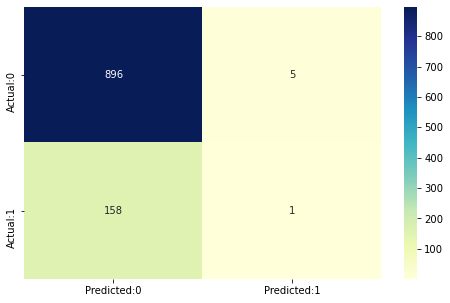

In [453]:
Kernel_SVC_rbf_predicted = kernel_clf.predict(X_test)
cm=confusion_matrix(y_test,Kernel_SVC_rbf_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [454]:
# Checking the accuracy
print(f"Using Kernel SVM (rbf) we get an accuracy of {accuracy_score(y_test,Kernel_SVC_rbf_predicted)*100}")

Using Kernel SVM (rbf) we get an accuracy of 84.62264150943396


#  Kernel SVM (poly)

In [455]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['poly']}

In [456]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']})

In [457]:
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [458]:
kernel_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.8607
Accuracy of Kernelized SVM on test set: 0.8472


In [459]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='poly',C=0.1,gamma=0.1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.85377358 0.84748428 0.85534591 0.85062893 0.8490566 ]
Average cross-validation score: 0.8513


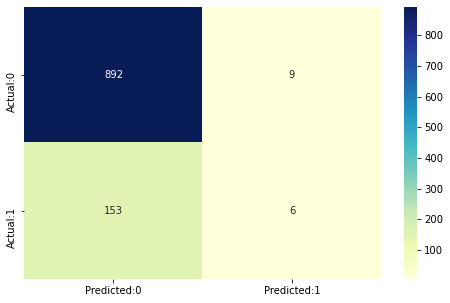

In [460]:
Kernel_SVC_poly_predicted = kernel_clf.predict(X_test)
cm=confusion_matrix(y_test,Kernel_SVC_poly_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [461]:
# Checking the accuracy
print(f"Using Kernel SVM (poly) we get an accuracy of {accuracy_score(y_test,Kernel_SVC_poly_predicted)*100}")

Using Kernel SVM (poly) we get an accuracy of 84.71698113207547


# Decision tree

In [462]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [463]:
print("Best parameters: {}".format(dt.best_params_))
print("Best cross-validation score: {:.2f}".format(dt.best_score_))
prediction6=dt.predict(X_test)
print("Prediction Accuracy:",metrics.accuracy_score(prediction6,y_test))

Best parameters: {'criterion': 'gini', 'max_depth': 5}
Best cross-validation score: 0.84
Prediction Accuracy: 0.8415094339622642


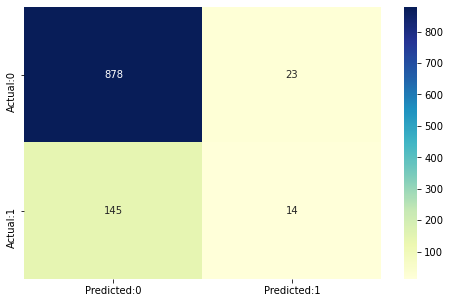

In [464]:
y_pred = dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [465]:
# Checking the accuracy
print(f"Using Decision tree we get an accuracy of {accuracy_score(y_test,y_pred)*100}")

Using Decision tree we get an accuracy of 84.15094339622642


# From the accuracies populated above we can say that Linear SVC is the best Classifier with accuracy score of 85.56%

In [466]:
# Checking the accuracy
print(f"Using Linear SVC we get an accuracy of {(accuracy_score(y_test,LSVC_predicted)*100)}")

Using Linear SVC we get an accuracy of 85.56603773584905
